# **Introduction**

Google Play Store is the official digital distribution platform for Android users which is developed and maintained by Google. It has over 3 million apps ready for download and is recognized across many countries making it a worldwide platform. Using the [Goole Play Sore Apps](https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps) dataset from Kaggle, I will conduct an explonatory data analysis study to various patterns and correlations between the data.



## Importing Libraries & Data Set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=fbdcbecc6a6e36900d12395e72f451e7cb55fd07bc3b91de41ab8f3e87244ac6
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
!pip install pyspark
from pyspark.sql import SparkSession

from pyspark.sql.functions import col, count, when

In [ ]:
# Start spark session
spark_session = SparkSession.builder.appName("Google Playstore Analysis").getOrCreate()

# Load in data
spark_df = spark_session.read.csv('Google-Playstore.csv', header=True, inferSchema=True)
spark_df.show()

+----------------------------------+--------------------+-----------------+------+------------+--------+----------------+----------------+----+-----+--------+----+---------------+--------------------+--------------------+--------------------+------------+------------+--------------+--------------------+------------+----------------+--------------+-------------------+
|                          App Name|              App Id|         Category|Rating|Rating Count|Installs|Minimum Installs|Maximum Installs|Free|Price|Currency|Size|Minimum Android|        Developer Id|   Developer Website|     Developer Email|    Released|Last Updated|Content Rating|      Privacy Policy|Ad Supported|In App Purchases|Editors Choice|       Scraped Time|
+----------------------------------+--------------------+-----------------+------+------------+--------+----------------+----------------+----+-----+--------+----+---------------+--------------------+--------------------+--------------------+------------+-----

## Exploring the Data

- The data set has 2,312,944 rows and 24 columns
- Has a mix between categorical and numerical values
- Data was collected during the month of June in 2021


In [ ]:
# Shape of the datafrmae
num_rows = spark_df.count()
num_cols = len(spark_df.columns)

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_cols}')

Number of rows: 2312944
Number of columns: 24


In [ ]:
# Provides various sstats for some columns
spark_df.describe().show()

+-------+--------------------+--------------------+--------------+--------------------+--------------------+-----------------+--------------------+--------------------+------------------+------------------+------------------+------------------+------------------+--------------------+-----------------+--------------------+---------------+------------------+---------------+-----------------------+--------------------+--------------------+--------------------+-------------------+
|summary|            App Name|              App Id|      Category|              Rating|        Rating Count|         Installs|    Minimum Installs|    Maximum Installs|              Free|             Price|          Currency|              Size|   Minimum Android|        Developer Id|Developer Website|     Developer Email|       Released|      Last Updated| Content Rating|         Privacy Policy|        Ad Supported|    In App Purchases|      Editors Choice|       Scraped Time|
+-------+--------------------+------

In [ ]:
# Finds number of null values for each column
null_counts = spark_df.select([
    count(when(col(c).isNull(), c)).alias(c) for c in spark_df.columns
])

# Show the result
null_counts.show()

+--------+------+--------+------+------------+--------+----------------+----------------+----+-----+--------+----+---------------+------------+-----------------+---------------+--------+------------+--------------+--------------+------------+----------------+--------------+------------+
|App Name|App Id|Category|Rating|Rating Count|Installs|Minimum Installs|Maximum Installs|Free|Price|Currency|Size|Minimum Android|Developer Id|Developer Website|Developer Email|Released|Last Updated|Content Rating|Privacy Policy|Ad Supported|In App Purchases|Editors Choice|Scraped Time|
+--------+------+--------+------+------------+--------+----------------+----------------+----+-----+--------+----+---------------+------------+-----------------+---------------+--------+------------+--------------+--------------+------------+----------------+--------------+------------+
|       0|     0|       0| 22883|       22883|     107|             107|               0|   0|    0|     135| 196|           6530|      

## Data Preprocessing

In [ ]:
# Drops any duplicate rows if there are any
spark_df = spark_df.drop_duplicates()
spark_df.show()

+-----------------------------+--------------------+---------------+------+------------+----------+----------------+----------------+----+-----+--------+----+---------------+--------------------+--------------------+--------------------+------------+------------+--------------+--------------------+------------+----------------+--------------+-------------------+
|                     App Name|              App Id|       Category|Rating|Rating Count|  Installs|Minimum Installs|Maximum Installs|Free|Price|Currency|Size|Minimum Android|        Developer Id|   Developer Website|     Developer Email|    Released|Last Updated|Content Rating|      Privacy Policy|Ad Supported|In App Purchases|Editors Choice|       Scraped Time|
+-----------------------------+--------------------+---------------+------+------------+----------+----------------+----------------+----+-----+--------+----+---------------+--------------------+--------------------+--------------------+------------+------------+-------

In [ ]:
# Returns column names
print(spark_df.columns)

['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs', 'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency', 'Size', 'Minimum Android', 'Developer Id', 'Developer Website', 'Developer Email', 'Released', 'Last Updated', 'Content Rating', 'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Scraped Time']


In [ ]:
# Because there are so many columns, I will remove the ones that aren't that particularly insightful
unnecessary_cols = ['App Id','Minimum Android','Developer Id','Developer Website','Developer Email','Released','Last Updated', 'Privacy Policy','Editors Choice', 'Scraped Time']
spark_df = spark_df.drop(*unnecessary_cols)

***Sidenote:

Because there there are still many entries with null values, I will remove all of those entries. Because the total amount of entries that will be removed is small, in comparison to the dataset size, there shouldn't be much of an effect on the overall analysis.

In [ ]:
# Removes entries with null values
spark_df = spark_df.dropna()

## Correlation Analysis & Visualization

In this section, I will be addressing various questions in order to look for relationships and correlations for some of the listed features. Along with this, data visualizations will be provided to see the patterns.


###  *- What are the top 10 most popular categories?*




In [ ]:
# Group the dataframe by category and its count
popular_df = spark_df.groupBy('Category').agg(count('*').alias('Total Number of Apps'))

# Get the 10 most popular categories
top_10_popular = popular_df.orderBy(col('Total Number of Apps').desc()).limit(10)
top_10_popular.show()

+-----------------+--------------------+
|         Category|Total Number of Apps|
+-----------------+--------------------+
|        Education|              127217|
|         Business|              100310|
|    Music & Audio|               87008|
|        Lifestyle|               75017|
|            Tools|               67215|
|    Entertainment|               63578|
|Books & Reference|               56514|
| Health & Fitness|               51770|
|         Shopping|               48979|
|     Productivity|               46959|
+-----------------+--------------------+



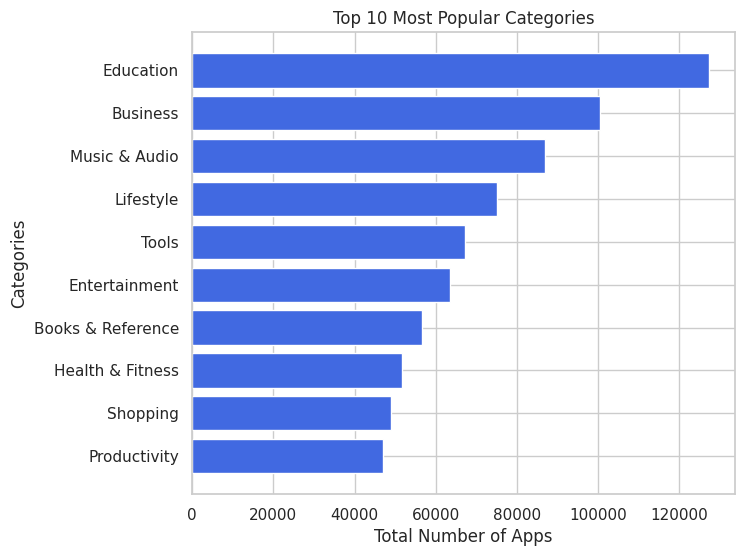

In [ ]:
# Plot the top 10 most popular apps
top_10_popular_pd = top_10_popular.toPandas()

x1 = top_10_popular_pd['Category'][::-1]
y1 = top_10_popular_pd['Total Number of Apps'][::-1]

sns.set(style='whitegrid')

plt.figure(figsize=(7,6))
plt.barh(x1,y1, color = ['royalblue'])
plt.xlabel('Total Number of Apps')
plt.ylabel('Categories')
plt.title('Top 10 Most Popular Categories')
plt.show()

### *- Which categories bring in the most revenue?*

In [ ]:
revenue_df = df[['Category','Price']].groupby('Category').sum().sort_values(by='Price', ascending=False)
revenue_df['Price'] = revenue_df.get('Price').round().astype(int)

# Rename price column to total revenue
revenue_df.rename(columns = {'Price' : 'Total Revenue'}, inplace=True)
revenue_df.head(10)

top_10_profit = revenue_df.head(10)
index_list = top_10_profit.index.to_list()[::-1]

print('Top 10 Categories Which Bring in the Most Revenue:', ', '.join(index_list) + '.')



Top 10 Categories Which Bring in the Most Revenue: Health & Fitness, Business, Lifestyle, Personalization, Productivity, Sports, Tools, Books & Reference, Medical, Education.


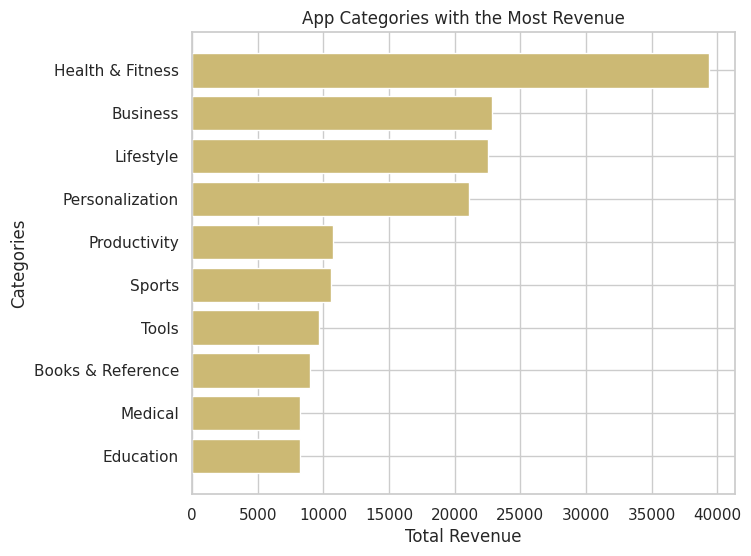

In [ ]:
# Graph the categories with the most total revenue
# Only graphing the first 10 categories

x2 = revenue_df.head(10).index
y2 = revenue_df.head(10).get('Total Revenue').sort_values()

sns.set(style='whitegrid')

plt.figure(figsize=(7,6))
plt.barh(x2,y2, color = 'y')
plt.xlabel('Total Revenue')
plt.ylabel('Categories')
plt.title('App Categories with the Most Revenue')
plt.show()

### *- What is the distribution of content ratings on the digital market?*

**Sidenote:

Because the content rating 'Everyone' will obviously be the most common rating, it will not be considered and others will be analyzed.

In [ ]:
# Filter out the 'Everyone' rating
not_everyone = df[df['Content Rating'] != 'Everyone']

# Group dataframe by content rating
cr_df = not_everyone.groupby('Content Rating').count()
cr_df = cr_df[['Category']]
cr_df.rename(columns = {'Category' : 'Count'}, inplace=True)

# 'Adults only 18+' and 'Unrated' have such small values so they will be combined into another row named 'Other'
cr_df.loc['Other'] = cr_df.loc['Adults only 18+'].get('Count') + cr_df.loc['Unrated'].get('Count')
cr_df = cr_df.drop(labels=['Adults only 18+', 'Unrated'], axis=0)

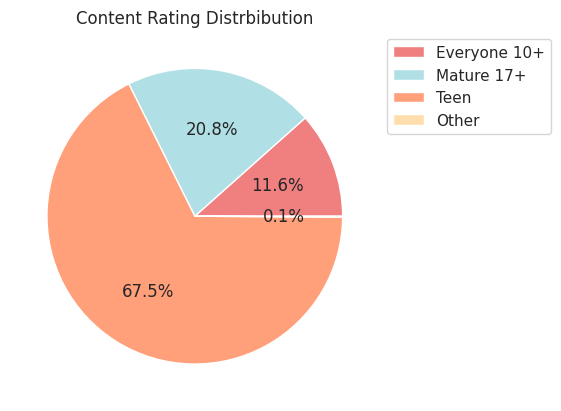

In [ ]:
#  Plot the distribution into a pie chart

labels = cr_df.index
data = cr_df.get('Count')
colors = ['lightcoral','powderblue','lightsalmon','navajowhite']

plt.pie(data, colors=colors, autopct='%1.1f%%')
plt.legend(labels, bbox_to_anchor=(1, 1), loc="best")
plt.title('Content Rating Distrbibution')
plt.show()

### *- Does an app being free affect its rating?*

In [ ]:
# Create a dataframe with only the columns you need

free_df = df[['Category', 'Free', 'Rating']]
free_df = free_df.groupby(['Category', 'Free']).mean()

# We will be analyzing categories as the analysis point so we will use the top 5 most popular ones
free_df = free_df.loc[top_10_popular.head(5).index]
free_df


Rating
Category      Free           
Education     False  1.687299
              True   2.262527
Music & Audio False  2.615112
              True   2.222964
Business      False  2.015970
              True   1.436335
Tools         False  2.591200
              True   2.338866
Entertainment False  2.251849
              True   2.437232

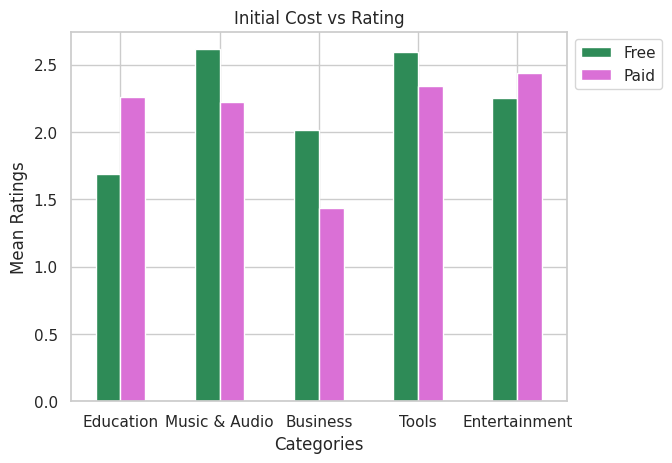

In [ ]:
# plot the data into an unstacked bar chart

free_df.unstack().plot(kind='bar', color = ['seagreen', 'orchid'])
plt.xticks(rotation=0)
plt.xlabel('Categories')
plt.ylabel('Mean Ratings')
plt.title('Initial Cost vs Rating')
plt.legend(['Free', 'Paid'], bbox_to_anchor=(1, 1))

plt.show()

### *- What is the relationship of the most downloaded apps with their rating?*

In [ ]:
# Create a data frame of the highest rated apps and most downloaded

comparison_df = df[['App Name', 'Rating', 'Maximum Installs']].set_index('App Name').sort_values(by='Maximum Installs', ascending=False)
comparison_df = comparison_df.head(10)

# Maximum installs data is too large so we will scale it down by 100,000,000
comparison_df['Maximum Installs'] = comparison_df['Maximum Installs'] / 1000000000
comparison_df

,Rating,Maximum Installs
App Name,,
Google Play services,4.2,12.057627
YouTube,4.4,9.766231
Google,4.2,9.154248
Google Maps - Navigate & Explore,3.8,9.141672
Google Text-to-Speech,4.1,9.034405
Google Chrome: Fast & Secure,4.1,8.925641
Gmail,4.2,8.756574
Android Accessibility Suite,4.2,7.408135
Google Drive,4.3,7.028265


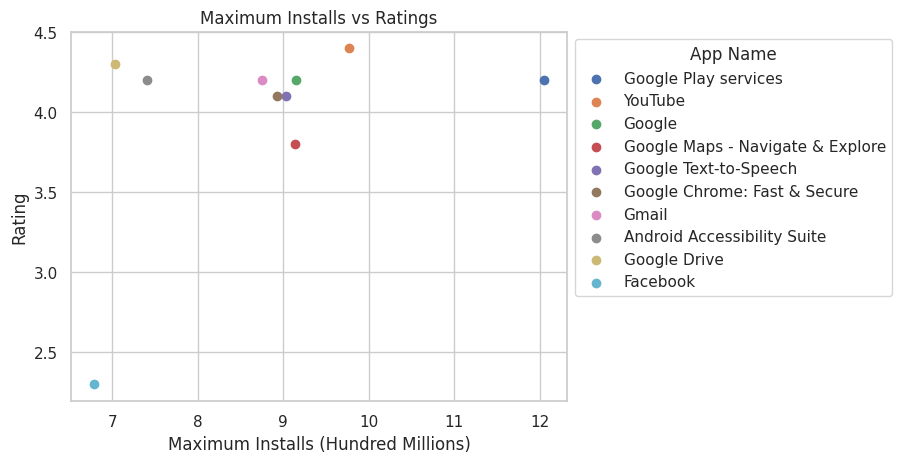

In [ ]:
# plot the apps with their maximum installs in respect of their rating

x3 = comparison_df.get('Maximum Installs')
y3 = comparison_df.get('Rating')
index_labels = comparison_df.index

sns.set_style("whitegrid")

for i in range(len(index_labels)):
  plt.scatter(x3[i], y3[i], label = index_labels[i])

plt.xlabel('Maximum Installs (Hundred Millions)')
plt.ylabel('Rating')
plt.title('Maximum Installs vs Ratings')

plt.legend(title = 'App Name', bbox_to_anchor=(1, 1))

plt.show()

## Drawing Conclusions

Now that the 5 problem statements have been addressed, I will review some of the conclusions and observations I have made after visualizing the data.

- Top 10 Most Popular Categories: Education, Music & Audio, Tools, Business, Entertainment, Lifestyle, Books & Reference, Personalization, Health & Fitness, Productivity.
- Top 10 Categories Which Bring in the Most Revenue: Travel & Local, Sports, Business, Health & Fitness, Personalization, Productivity, Tools, Books & Reference, Medical, Education.
- The content rating distribution excluding 'Everyone' is:
  - Teen: 68.2%
  - Mature 17+: 20.4%
  - Everyone 10+: 11.4%
  - Other: 0.1%

- There seems to be little to no effect of the intial cost (being free or paid) on the overall mean rating for each of the categories.

- Just because an app has an extremely high number of installs, doesn't mean that it will be highly rated.

# Thank you!!!

